In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os


In [9]:
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")

TensorFlow version: 2.19.0
GPU is NOT available


In [10]:
dataset_path = os.path.join(os.getcwd(), "Strabismus_Dataset")  # 'dataset' should be in the same folder as your script


In [11]:
def load_data(data_dir, img_size=(96, 96)):

    images = []
    labels = []

    for label, folder in enumerate(['NORMAL', 'STRAB1']):  # Replace with actual folder names
        folder_path = os.path.join(data_dir, folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, img_size) / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [12]:
# X, y = load_data(dataset_path)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Data Augmentation for Training Data
# train_datagen = ImageDataGenerator(
#     rotation_range=20,      # Randomly rotate images by up to 20 degrees
#     width_shift_range=0.2,  # Randomly shift images horizontally by 20% of width
#     height_shift_range=0.2, # Randomly shift images vertically by 20% of height
#     zoom_range=0.2,         # Randomly zoom in or out
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill in missing pixels with the nearest pixel values
# )

# # Validation Data Generator (no augmentation, just rescaling)
# val_datagen = ImageDataGenerator(
#     rescale=1.0/255.0
# )

# # Create augmented data generators
# train_data = train_datagen.flow(X_train, y_train, batch_size=10)
# val_data = val_datagen.flow(X_val, y_val, batch_size=5)

In [13]:
##Dataaugmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # More aggressive augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% train, 20% validation
)

#Set batch_size to 40
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(96, 96),
    batch_size = 20,  # Use batch size of 40 for training
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(96, 96),
    batch_size= 10,  # Use batch size of 40 for validation
    class_mode='binary',
    subset='validation'
)

print(f"Training batches per epoch: {len(train_data)}")
print(f"Validation batches per epoch: {len(val_data)}")


Found 112 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Training batches per epoch: 6
Validation batches per epoch: 3


In [ ]:
## Logistic Regression
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# import numpy as np


# model = Sequential([
#     Flatten(input_shape=(96, 96, 3)),  # Flatten the input
#     Dense(1, activation='sigmoid')  # Logistic regression for binary classification
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train,
#                     validation_data=(X_val, y_val),
#                     epochs=12,  # Adjust epochs as needed
#                     batch_size=32,
#                     verbose=1)

##CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,  # Adjust epochs based on performance
    verbose=1
)


c:\Users\Swarnim\anaconda3.0\envs\nemo_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Swarnim\anaconda3.0\envs\nemo_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.6137 - loss: 0.7027 - val_accuracy: 0.7037 - val_loss: 0.6445
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7420 - loss: 0.6304 - val_accuracy: 0.7037 - val_loss: 0.6341
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6765 - loss: 0.6331 - val_accuracy: 0.7037 - val_loss: 0.6464
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7037 - loss: 0.6184 - val_accuracy: 0.7037 - val_loss: 0.6302
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7144 - loss: 0.6178 - val_accuracy: 0.7037 - val_loss: 0.6371
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7201 - loss: 0.5780 - val_accuracy: 0.7037 - val_loss: 0.6450
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7062 - loss: 0.5808 - val_accuracy: 0.7037 - val_loss: 0.6253
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7514 - loss: 0.5286 - val_accuracy: 0.7037 - val_loss: 0.6438

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7579 - loss: 0.6866
Validation Accuracy: 74.07%


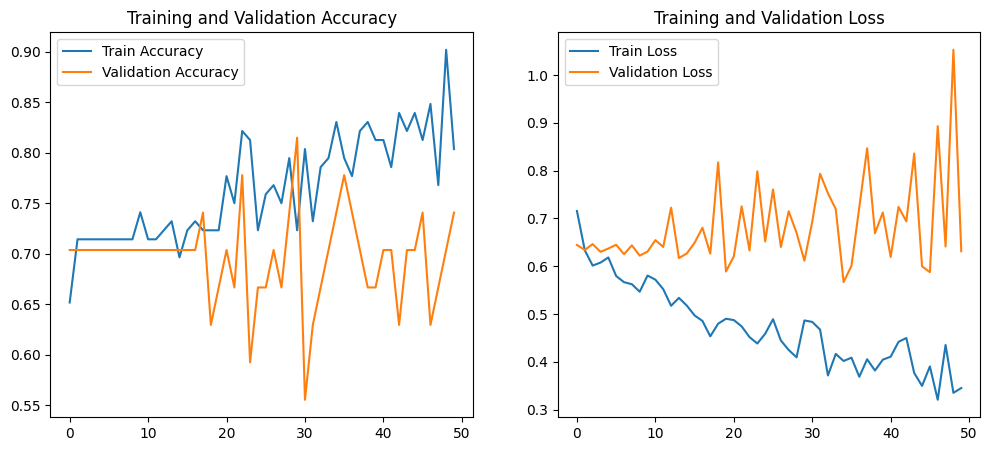

In [15]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

# Plot training and validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)


In [16]:
model.save('strabismus_detection_model.h5')
print("Model saved as strabismus_detection_model.h5")


Model saved as strabismus_detection_model.h5


In [17]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('strabismus_detection_model.h5')


In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_paths = [os.path.join(os.getcwd(), "Strabismus_Check", f"{i}.jpg") for i in range(20)]


for img_path in image_paths:
    img = load_img(img_path, target_size=(96, 96))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print(f"Prediction for {img_path}: {prediction}")

    if prediction[0] > 0.5:
        print("Predicted: Strabismus")
    else:
        print("Predicted: Normal")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\0.jpg: [[0.28852367]]
Predicted: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\1.jpg: [[0.9958034]]
Predicted: Strabismus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\2.jpg: [[0.8114712]]
Predicted: Strabismus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\3.jpg: [[0.9999938]]
Predicted: Strabismus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\4.jpg: [[0.9917144]]
Predicted: Strabismus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\5.jpg: [[0.80220103]]
Predicted: Strabismus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction for c:\Users\Swarnim\Desktop\Strabismus\Strabismus_Check\6.